## 라이브러리 호출 및 함수 정의

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## simul IHW result with PC transformed cov (eff=3)

In [9]:
info = pd.read_csv("../../Data/result_final/simul_IHW_pca/info_simul100_effsize3_basic.csv")
info = pd.DataFrame(info.mean(axis=0))

dfs = pd.DataFrame(pd.read_csv("../../Data/result_final/simul_IHW_pca/info_simul100_effsize3.csv")).mean(axis=0)
dfs = pd.DataFrame(dfs)
dfs = pd.concat([info, dfs.iloc[4:,:]])
dfs

,0
disc_true,1996.430000
disc_FWER,56.750000
FDR_FWER,0.000159
TPR_FWER,0.028423
disc_BH,537.670000
...,...
TPR_BL_Cov26,0.266795
TPR_BL_Cov27,0.266703
TPR_BL_Cov28,0.266793
TPR_BL_Cov29,0.266812


In [10]:
disc_IHW = dfs.iloc[dfs[0].index.str.contains('disc_IHW'),]
disc_BL = dfs.iloc[dfs[0].index.str.contains('disc_BL'),]

FDR_IHW = dfs.iloc[dfs[0].index.str.contains('FDR_IHW'),]
FDR_BL = dfs.iloc[dfs[0].index.str.contains('FDR_BL'),]

TPR_IHW = dfs.iloc[dfs[0].index.str.contains('TPR_IHW'),]
TPR_BL = dfs.iloc[dfs[0].index.str.contains('TPR_BL'),]


column_list = list(range(1,31))
disc_IHW.index = column_list
disc_BL.index = column_list
FDR_IHW.index = column_list
FDR_BL.index = column_list
TPR_IHW.index = column_list
TPR_BL.index = column_list

In [12]:
dfs.iloc[:10,:]

,0
disc_true,1996.430000
disc_FWER,56.750000
FDR_FWER,0.000159
TPR_FWER,0.028423
disc_BH,537.670000
FDR_BH,0.044337
TPR_BH,0.257292
disc_Storey,560.250000
FDR_Storey,0.048977
TPR_Storey,0.266800


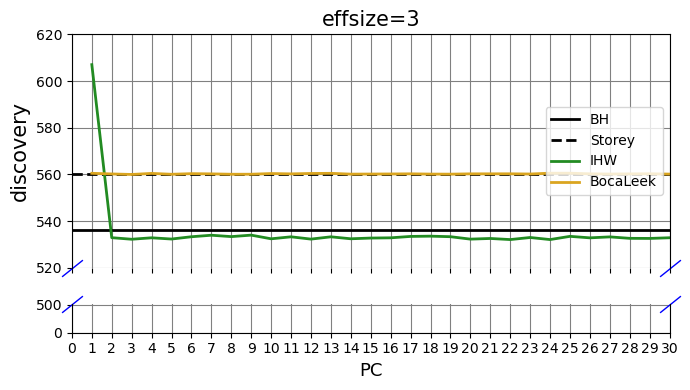

In [5]:
from matplotlib.gridspec import GridSpec
from string import ascii_lowercase, ascii_uppercase

fig = plt.figure(figsize=(7,4))
gs = GridSpec(nrows=2, ncols=1, height_ratios=[8, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

d = .8    # how big to make the diagonal lines in axes coordinates

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='blue', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlim(1,30)
ax2.set_ylim(0, 520)

ax2.set_xlabel("PC", size=13)

ax2.grid(color="grey")
ax2.set_xticks(np.arange(0, 31, step=1))


ax1.axhline(y=dfs.loc["disc_BH",0], color="black", linewidth=2, label = 'BH')
ax1.axhline(y=dfs.loc["disc_Storey",0], color="black", linewidth=2, linestyle="--",  label = 'Storey')
ax1.plot(disc_IHW, color="forestgreen", linewidth=2, label = 'IHW')
ax1.plot(disc_BL, color="goldenrod", linewidth=2, label = 'BocaLeek')

ax1.set_title("effsize=3", fontsize=15)
ax1.legend(loc="right")
ax1.set_xlim(1,30)
ax1.set_ylim(520, 620)

ax1.set_ylabel("discovery", size=15)
ax1.grid(color="grey")
ax1.set_xticks(np.arange(0, 31, step=1))
ax1.set_xticklabels([])

plt.tight_layout()
plt.savefig("../../Figure/simul_IHW_pca/result_simul_IHW_pca_eff3_disc.pdf")

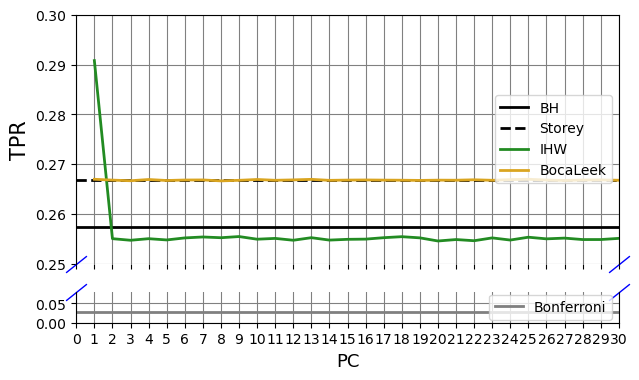

In [20]:
from matplotlib.gridspec import GridSpec
from string import ascii_lowercase, ascii_uppercase

fig = plt.figure(figsize=(7,4))
gs = GridSpec(nrows=2, ncols=1, height_ratios=[8, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

d = .8    # how big to make the diagonal lines in axes coordinates

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='blue', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlim(1,30)
ax2.set_ylim(0, 0.08)

ax2.set_xlabel("PC", size=13)

ax2.grid(color="grey")
ax2.set_xticks(np.arange(0, 31, step=1))

ax2.axhline(y=dfs.loc["TPR_FWER",0], color="grey", linewidth=2, label = 'Bonferroni')
ax1.axhline(y=dfs.loc["TPR_BH",0], color="black", linewidth=2, label = 'BH')
ax1.axhline(y=dfs.loc["TPR_Storey",0], color="black", linewidth=2, linestyle="--",  label = 'Storey')
ax1.plot(TPR_IHW, color="forestgreen", linewidth=2, label = 'IHW')
ax1.plot(TPR_BL, color="goldenrod", linewidth=2, label = 'BocaLeek')

#ax1.set_title("effsize=3", fontsize=15)
ax1.legend(loc="right")
ax2.legend(loc="right")
ax1.set_xlim(1,30)
ax1.set_ylim(0.25, 0.3)

ax1.set_ylabel("TPR", size=15)
ax1.grid(color="grey")
ax1.set_xticks(np.arange(0, 31, step=1))
ax1.set_xticklabels([])

plt.savefig("../../Figure/simul_IHW_pca/result_simul_IHW_pca_eff3_TPR.pdf")
#plt.show()

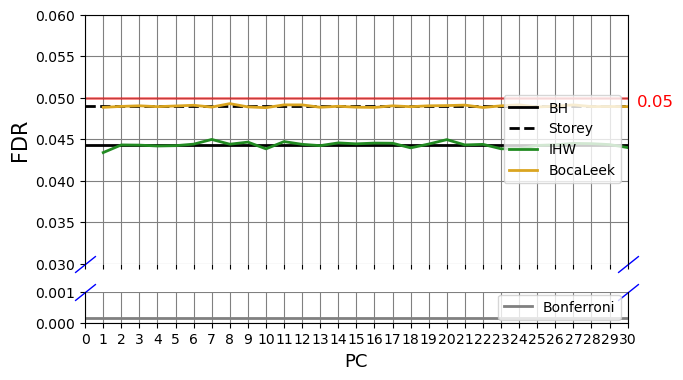

In [19]:
from matplotlib.gridspec import GridSpec
from string import ascii_lowercase, ascii_uppercase

fig = plt.figure(figsize=(7,4))
gs = GridSpec(nrows=2, ncols=1, height_ratios=[8, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

d = .8    # how big to make the diagonal lines in axes coordinates

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='blue', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlim(1,30)
ax2.set_ylim(0, 0.001)

ax2.set_xlabel("PC", size=13)

ax2.grid(color="grey")
ax2.set_xticks(np.arange(0, 31, step=1))

ax2.axhline(y=dfs.loc["FDR_FWER",0], color="grey", linewidth=2, label = 'Bonferroni')
ax1.axhline(y=dfs.loc["FDR_BH",0], color="black", linewidth=2, label = 'BH')
ax1.axhline(y=dfs.loc["FDR_Storey",0], color="black", linewidth=2, linestyle="--",  label = 'Storey')
ax1.plot(FDR_IHW, color="forestgreen", linewidth=2, label = 'IHW')
ax1.plot(FDR_BL, color="goldenrod", linewidth=2, label = 'BocaLeek')

ax1.axhline(y=0.05, color="red", linewidth=2, alpha=0.5)
ax1.text(30.5, 0.049, "0.05", color = 'red', size = 12)

ax1.legend(loc="right")
ax2.legend(loc="right")
ax1.set_xlim(1,30)
ax1.set_ylim(0.03, 0.06)

ax1.set_ylabel("FDR", size=15)
ax1.grid(color="grey")
ax1.set_xticks(np.arange(0, 31, step=1))
ax1.set_xticklabels([])

plt.savefig("../../Figure/simul_IHW_pca/result_simul_IHW_pca_eff3_FDR.pdf")
#plt.show()

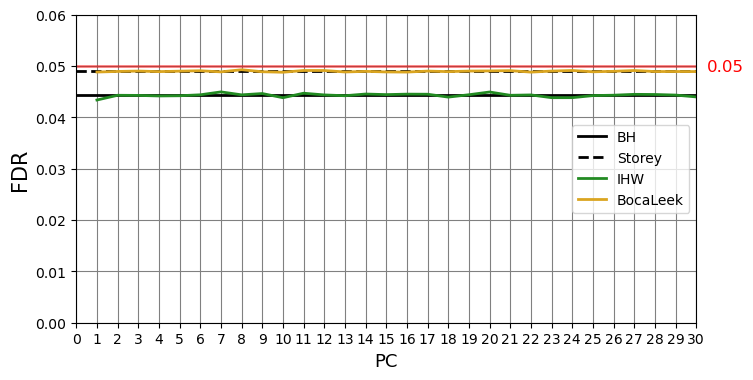

In [7]:
plt.figure(figsize=(8,4))


plt.axhline(y=dfs.loc["FDR_BH",0], color="black", linewidth=2, label = 'BH')
plt.axhline(y=dfs.loc["FDR_Storey",0], color="black", linewidth=2, linestyle="--",  label = 'Storey')
plt.plot(FDR_IHW, color="forestgreen", linewidth=2, label = 'IHW')
plt.plot(FDR_BL, color="goldenrod", linewidth=2, label = 'BocaLeek')

#plt.title("effsize=3", fontsize=15)
plt.xlim(1, 30)
plt.ylim(0, 0.06)
plt.xlabel("PC", size=13)
plt.ylabel("FDR", size=15)
plt.grid(color="grey")
plt.xticks(np.arange(0,31, step=1))
plt.axhline(y=0.05, color="red", linewidth=2, alpha=0.5)
plt.text(30.5, 0.049, "0.05", color = 'red', size = 12)

plt.legend(loc="right")

plt.savefig("../../Figure/simul_IHW_pca/result_simul_IHW_pca_eff3_FDR.pdf")